### importing esential library and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('bmh')

# for Interactive Shells
from IPython.display import display

In [2]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


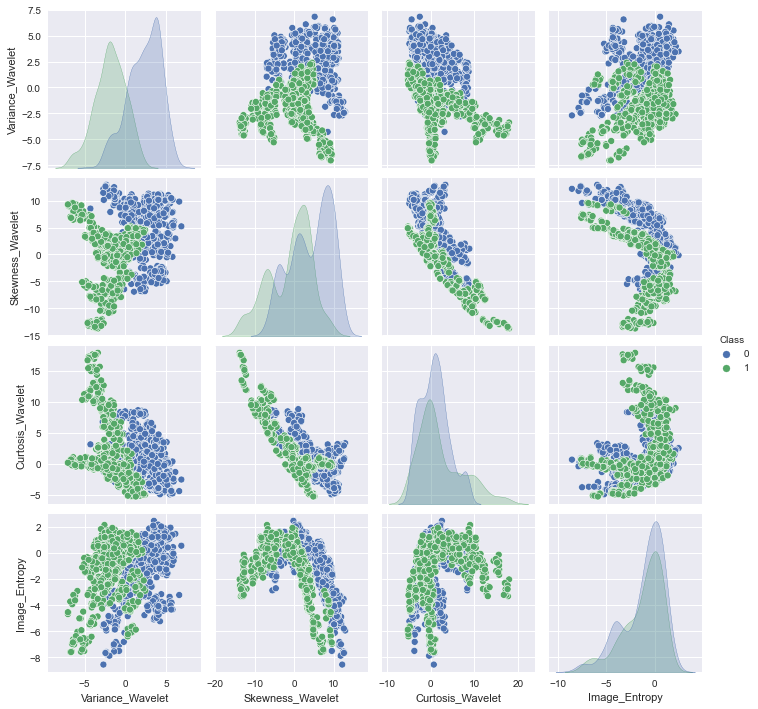

In [4]:
plt.style.use('seaborn')

sns.pairplot(df,hue='Class')

In [5]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [9]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [12]:
import warnings

warnings.filterwarnings('ignore')

In [13]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [14]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [15]:
predictions = grid.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



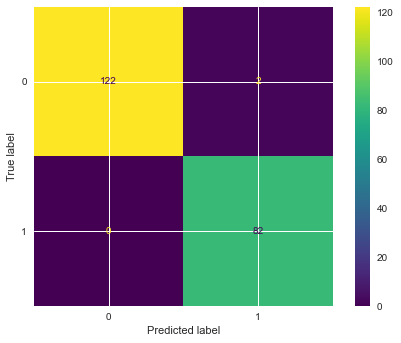

In [18]:
plot_confusion_matrix(grid,X_test,y_test)

In [19]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [20]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

0.9931389365351629

In [21]:
#example

new_data = [['3.62160','8.6661','-2.8073','-0.44699']]

grid.predict(new_data)

#predicted class---->0

array([0], dtype=int64)

## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

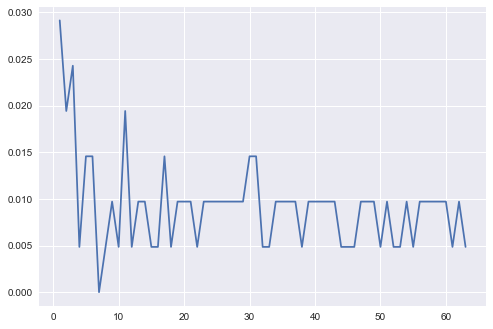

In [24]:
plt.plot(range(1,64),errors)

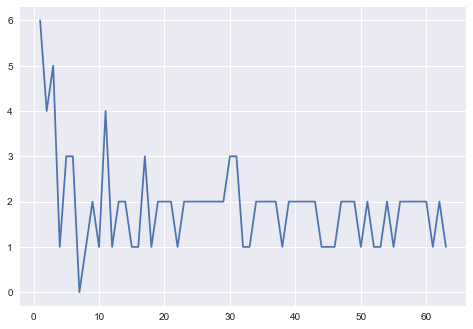

In [25]:
plt.plot(range(1,64),misclassifications)